In [23]:
import pandas as pd
from fastai.vision import open_image
from annoy import AnnoyIndex
from ast import literal_eval

In [2]:
df = pd.read_csv('./misc/recomm_df.csv', converters={"img_repr": literal_eval})
df

img_path             label  \
0     ..\best-artworks-dataset\images\images\Albrech...    Albrecht_Durer   
1     ..\best-artworks-dataset\images\images\Albrech...    Albrecht_Durer   
2     ..\best-artworks-dataset\images\images\Albrech...    Albrecht_Durer   
3     ..\best-artworks-dataset\images\images\Albrech...    Albrecht_Durer   
4     ..\best-artworks-dataset\images\images\Albrech...    Albrecht_Durer   
...                                                 ...               ...   
8441  ..\best-artworks-dataset\images\images\Diego_V...   Diego_Velazquez   
8442  ..\best-artworks-dataset\images\images\Edgar_D...       Edgar_Degas   
8443  ..\best-artworks-dataset\images\images\Edgar_D...       Edgar_Degas   
8444  ..\best-artworks-dataset\images\images\Vincent...  Vincent_van_Gogh   
8445  ..\best-artworks-dataset\images\images\Titian\...            Titian   

      label_id                                           img_repr  
0            0  [0.0, 0.0, 0.9734272956848145, 1.5306733846664...  
1            0  [0.0, 0.0, 26.06556510925293, 0.0, 11.46798706...  
2            0  [0.0, 0.0, 31.00691032409668, 0.0, 22.78203773...  
3            0  [1.9838361740112305, 0.0, 9.133316040039062, 0...  
4            0  [0.0, 0.0, 12.960528373718262, 1.4576480388641...  
...        ...                                                ...  
8441         9  [-5.1439900398254395, 10.648713111877441, -5.8...  
8442        10  [-1.1346280574798584, -13.131939888000488, -6....  
8443        10  [3.9079391956329346, 16.12967872619629, 3.6587...  
8444        48  [-6.336883068084717, -1.4831352233886719, -8.8...  
8445        46  [11.876293182373047, 13.507923126220703, 26.85...  

[8446 rows x 4 columns]

In [3]:
annoy_idx = AnnoyIndex(len(df['img_repr'][0]), metric='euclidean')

for it, vector in enumerate(df['img_repr']):
    annoy_idx.add_item(it, vector)
    
_ = annoy_idx.build(n_trees=50)

In [44]:
def get_similar_images_annoy(img_index, img_no):
    base_img_id, base_vector, base_label  = df.iloc[img_index, [0, 3, 1]]
    similar_img_ids = annoy_idx.get_nns_by_item(img_index, img_no)
    return base_img_id, base_label, df.iloc[similar_img_ids]

1
Artist: Albrecht_Durer


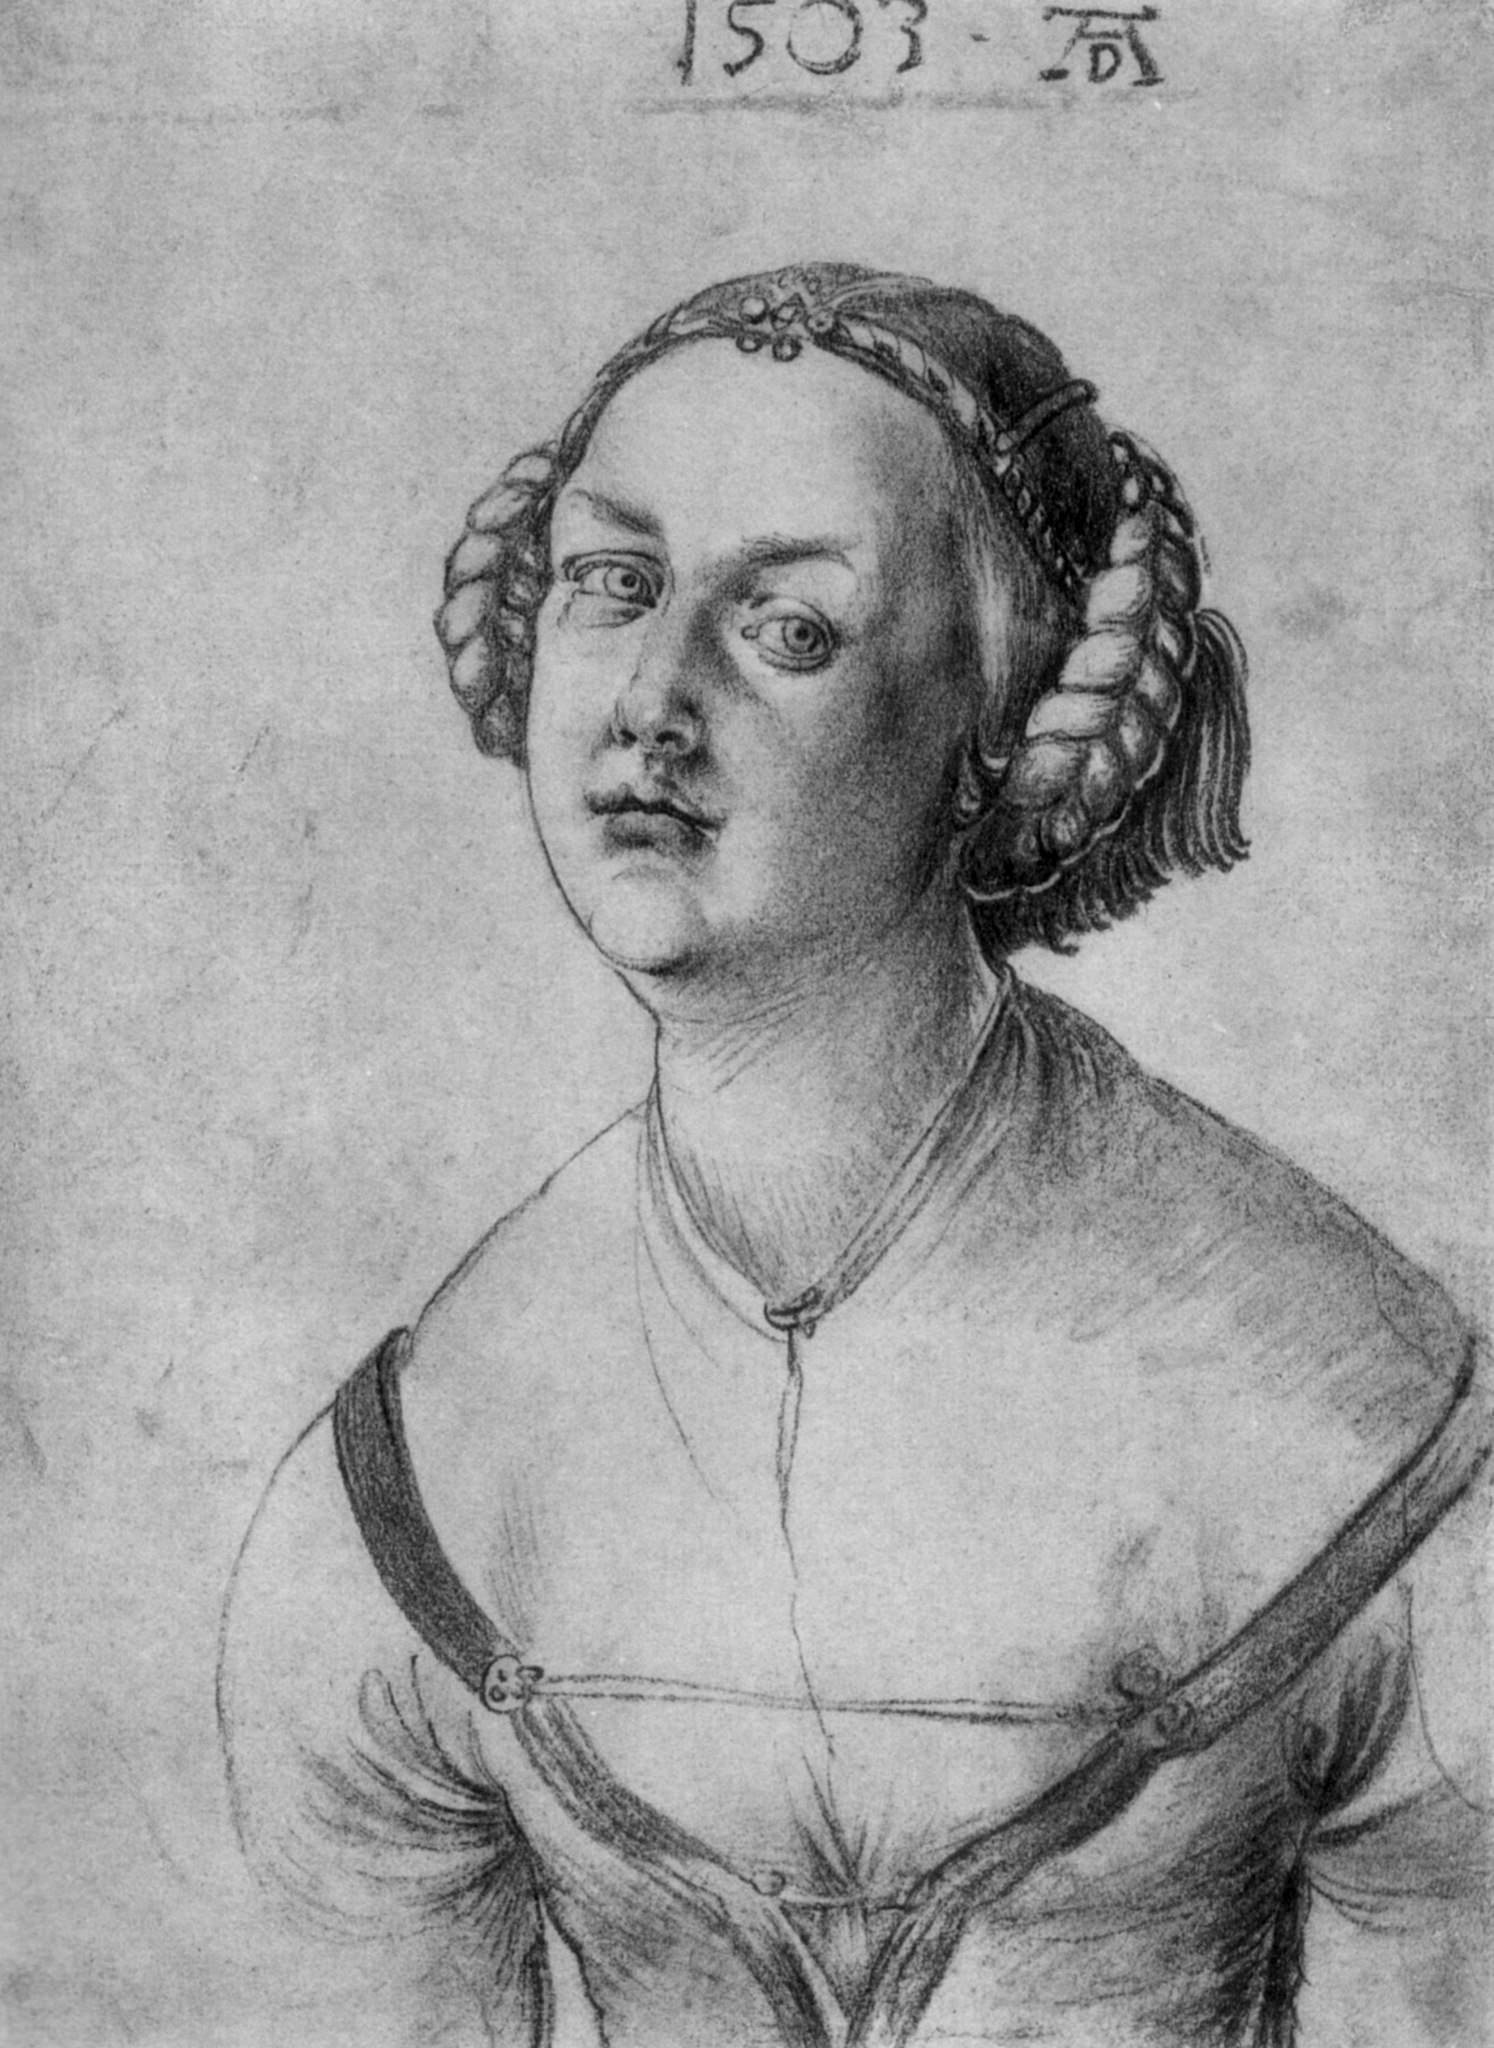

In [48]:
imgidx = df.loc[ df['img_path'] == '..\\best-artworks-dataset\\images\\images\\Albrecht_Durer\\Albrecht_Durer_10.jpg' ].index[0]
print(imgidx)

base_image, base_label, similar_images_df = get_similar_images_annoy(img_index=imgidx, img_no=5)
print('Artist:', base_label)
open_image(base_image)

In [49]:
similar_images_df

img_path           label  label_id                                           img_repr
1   ..\best-artworks-dataset\images\images\Albrech...  Albrecht_Durer         0  [0.0, 0.0, 26.06556510925293, 0.0, 11.46798706...
38  ..\best-artworks-dataset\images\images\Albrech...  Albrecht_Durer         0  [0.0, 0.0, 28.88425064086914, 0.0, 10.88313961...
54  ..\best-artworks-dataset\images\images\Albrech...  Albrecht_Durer         0  [0.0, 0.0, 20.294063568115234, 0.0, 11.1423044...
33  ..\best-artworks-dataset\images\images\Albrech...  Albrecht_Durer         0  [0.0, 0.0, 28.476259231567383, 0.0, 4.16234540...
15  ..\best-artworks-dataset\images\images\Albrech...  Albrecht_Durer         0  [0.0, 0.0, 32.21288299560547, 0.0, 26.63869476...

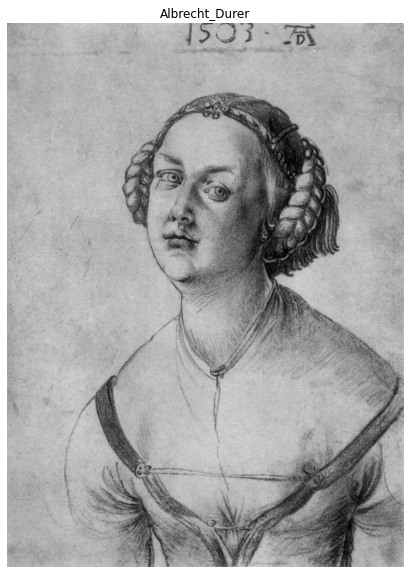

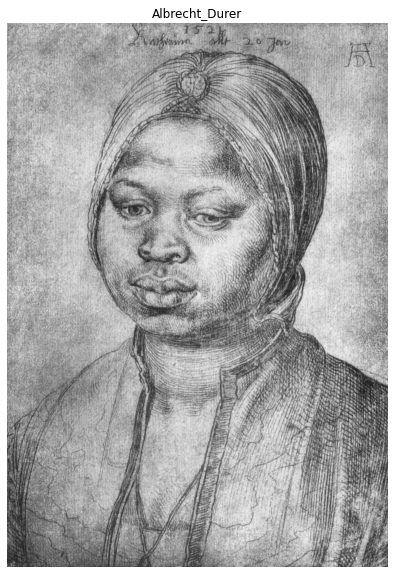

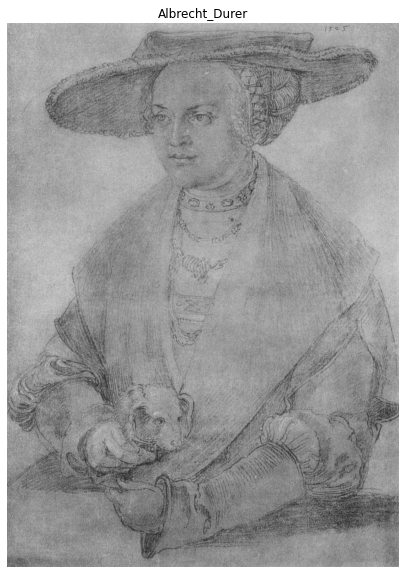

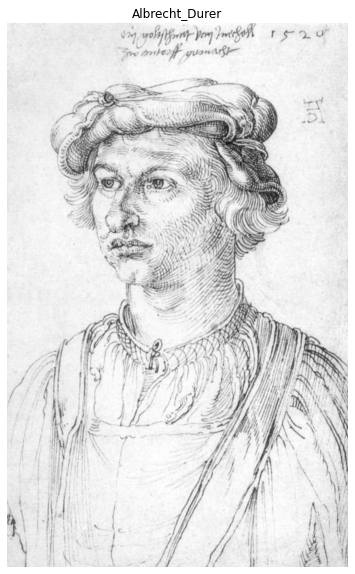

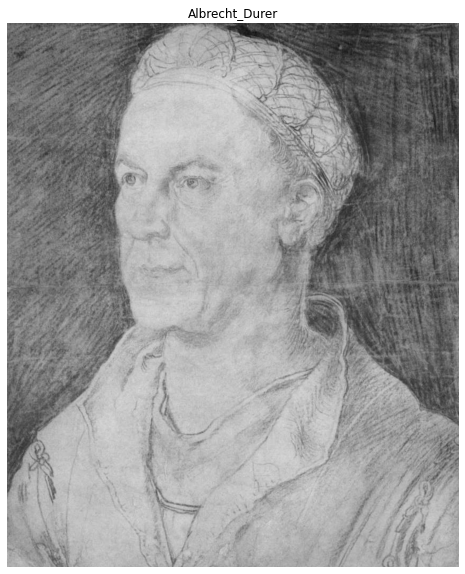

In [50]:
for idx, row in similar_images_df.iterrows():
    open_image(row['img_path']).show(figsize=(15,10), title=row['label'])